# Linguistic Analysis of Datasets
Linguistic analysis of all the four datasets $\textbf{Adept}$, $\textbf{Ellie}$, $\textbf{PaP}$ and $\textbf{PeP-3k}$.  
  
Please install the packages specified by the requirements.txt file, e.g., in a conda virtual environment.

In [1]:
# Uncomment and run the following code if you are running the analysis in Google Colab.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import json as simplejson
import seaborn as sns
from collections import Counter
from transformers import BertTokenizer
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from wordcloud import WordCloud
from gensim.models import Word2Vec

/mount/studenten/arbeitsdaten-studenten1/shencg/condaenvs/semplausWS2324/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /home/users0/shencg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/users0/shencg/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users0/shencg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Specify paths.
# Please replace the following paths with your own paths if you are using different ones.

# Project path.
PROJECT_PATH = '<root_dir_of_this_repo>'

# Cache path that saves, e.g., pretrained models.
CACHE_PATH = PROJECT_PATH + 'cache/'

# Path for all datasets.
DATA_PATH = PROJECT_PATH + 'datasets/'

# Paths for adept.
ADEPT_TRAIN_PATH = DATA_PATH + 'adept/train-dev-test-split/train.json'
ADEPT_DEV_PATH = DATA_PATH + 'adept/train-dev-test-split/val.json'
ADEPT_TEST_PATH = DATA_PATH + 'adept/train-dev-test-split/test.json'

# Path for Ellie.
ELLIE_PATH = DATA_PATH + 'ellie/evaluation-dataset/'

# Paths for PaP.
# unfiltered version
PAP_TRAIN_PATH = DATA_PATH + 'pap/train-dev-test-split/binary/train.csv'
PAP_DEV_PATH = DATA_PATH + 'pap/train-dev-test-split/binary/dev.csv'
PAP_TEST_PATH = DATA_PATH + 'pap/train-dev-test-split/binary/test.csv'
# filtered version
PAP_TRAIN_FILTERED_PATH = DATA_PATH + 'pap/train-dev-test-split-filtered/binary/train.csv'
PAP_DEV_FILTERED_PATH = DATA_PATH + 'pap/train-dev-test-split-filtered/binary/dev.csv'
PAP_TEST_FILTERED_PATH = DATA_PATH + 'pap/train-dev-test-split-filtered/binary/test.csv'

# Paths for PeP-3k.
PEP_TRAIN_PATH = DATA_PATH + 'pep-3k/train-dev-test-split/train.csv'
PEP_DEV_PATH = DATA_PATH + 'pep-3k/train-dev-test-split/dev.csv'
PEP_TEST_PATH = DATA_PATH + 'pep-3k/train-dev-test-split/test.csv'

In [4]:
# Get nltk stop words.
stop_words = set(stopwords.words('english'))
print("Number of stop words:", len(stop_words))
print(stop_words)

Number of stop words: 179
{'themselves', 'has', "didn't", 'ours', 'doing', 'very', 'll', 'aren', "hadn't", 'all', 'd', 'wouldn', 'theirs', 'which', 'your', 'more', 'i', 'am', 'hasn', 'through', 'be', 'their', 'yourself', 'm', 'we', 'were', 'it', "couldn't", 'as', "you'd", 're', 'y', 'yours', 'haven', 'weren', 'too', 'if', 'own', 'that', 'those', 'an', 'is', "haven't", 'she', 'then', 'most', 'at', 'doesn', 'for', 'above', 'you', 'these', 'with', 'other', 'to', 'off', "doesn't", 'them', "wasn't", 'does', "you're", 'being', 'by', 'during', 'down', 'out', 's', "mightn't", 'mustn', 'o', 've', 'had', 'a', 'few', 'ain', 'or', 'they', "hasn't", 'whom', 'won', 'shouldn', 'about', 'yourselves', 'should', 'of', 'hers', 'between', 'here', 'don', 'so', 'not', 'this', 'nor', 'its', 'him', "she's", 'further', 'mightn', 'needn', 'once', 'do', 'just', "won't", 'what', 'my', 'from', 'after', 'how', "you'll", 'hadn', "that'll", 'but', 'didn', 'ourselves', 'some', "needn't", 'again', 'myself', 'why', 'no'

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', cache_dir=CACHE_PATH)
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

## **Initialize** (packages and data path)
### Before staring the session, make sure to upload all the datasets to your Google Drive, and change the data path according to YOUR path.
In case of the colab notebook not working, kindly refer to the alternative here: https://github.com/st143575/SemPlaus-plausibleparrots

# **adept** (add modifier)
### 0: implausible
### 1-4: plausible

## Have a basic grasp of the data
### Investigate Label Distribution




In [6]:
# Load the Adept train set and check the number of instances.
adept_train_df = pd.read_json(ADEPT_TRAIN_PATH)
adept_train_df

sentence1  \
0                The effect of sleeping is rejuvenation.   
1                      A toothbrush is for fresh breath.   
2                                    A scene is painted.   
3                                 A bone breaks a tooth.   
4                             A trip causes a happening.   
...                                                  ...   
12887              A pub is for corned beef and cabbage.   
12888        Lidocaine is used to stop heart arrhythmia.   
12889  An arm is used for drapping a towel when servi...   
12890                            A farmer shakes a tree.   
12891      A closet is used for keeping your clothes in.   

                                               sentence2    modifier  \
0      The effect of additional sleeping is rejuvenat...  additional   
1              A regular toothbrush is for fresh breath.     regular   
2                           A negative scene is painted.    negative   
3                        An alleged bone breaks a tooth.     alleged   
4                    A fabulous trip causes a happening.    fabulous   
...                                                  ...         ...   
12887       A decent pub is for corned beef and cabbage.      decent   
12888  Tumescent lidocaine is used to stop heart arrh...   tumescent   
12889  A roving arm is used for drapping a towel when...      roving   
12890                  An ignorant farmer shakes a tree.    ignorant   
12891  An essential closet is used for keeping your c...   essential   

             noun  label    idx  
0        sleeping      3  13484  
1      toothbrush      2   2620  
2           scene      2   3324  
3            bone      2  10610  
4            trip      2  14917  
...           ...    ...    ...  
12887         pub      2  13505  
12888   lidocaine      0   7406  
12889         arm      1   5172  
12890      farmer      2   8846  
12891      closet      2  13281  

[12892 rows x 6 columns]

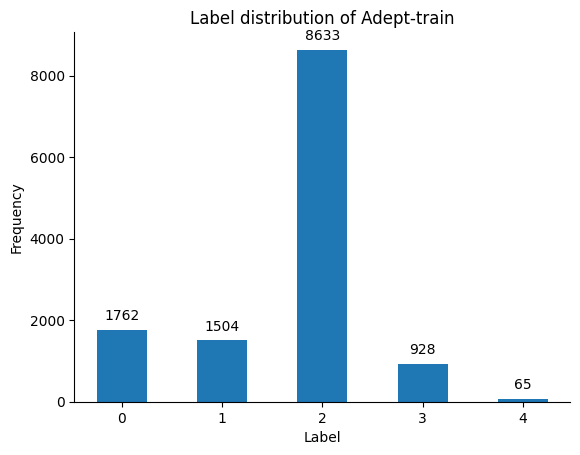

In [7]:
# Label distribution of Adept train set.

plot_adept_train = adept_train_df['label'].plot(kind='hist', bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], align='mid', rwidth=0.5, title='Label distribution of Adept-train')
plt.gca().spines[['top', 'right',]].set_visible(False)

plot_adept_train.xaxis.set_major_locator(MaxNLocator(integer=True))

plot_adept_train.set_xlabel('Label')

for p in plot_adept_train.patches:
    if p.get_height() > 0:
        plot_adept_train.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
plt.savefig('plot_adept_train.png', dpi=200)

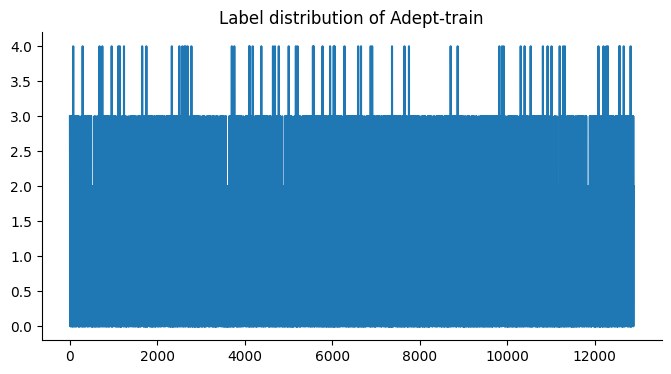

In [8]:
# More details of the label distribution.
adept_train_df['label'].plot(kind='line', figsize=(8, 4), title='Label distribution of Adept-train')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.savefig('plot_adept_train_details.png', dpi=200)

In [9]:
# Load the Adept dev set and check the number of instances.
adept_dev_df = pd.read_json(ADEPT_DEV_PATH)
adept_dev_df

sentence1  \
0           An ottoman is for reclining your legs.   
1                         A butcher bones a roast.   
2                Creditors lends money to debters.   
3                       You use a lobby to loiter.   
4     You use a tenor to drown out a conversation.   
...                                            ...   
1606             A name is for identifying people.   
1607                              A bush is alive.   
1608      A trumpet is for annoying the neighbors.   
1609                 Height matters in basketball.   
1610                A repairman attempts a repair.   

                                              sentence2     modifier  \
0     A comfortable ottoman is for reclining your legs.  comfortable   
1                        A local butcher bones a roast.        local   
2               Aware creditors lends money to debters.        aware   
3                     You use a flashy lobby to loiter.       flashy   
4     You use a dramatic tenor to drown out a conver...     dramatic   
...                                                 ...          ...   
1606        A plausible name is for identifying people.    plausible   
1607                             A hairy bush is alive.        hairy   
1608      A dead trumpet is for annoying the neighbors.         dead   
1609               Raised height matters in basketball.       raised   
1610            A modified repairman attempts a repair.     modified   

           noun  label    idx  
0       ottoman      3     27  
1       butcher      2  12331  
2     creditors      2  11750  
3         lobby      2   5254  
4         tenor      2  11609  
...         ...    ...    ...  
1606       name      2  10871  
1607       bush      0   8148  
1608    trumpet      0  12818  
1609     height      2   7340  
1610  repairman      0  14335  

[1611 rows x 6 columns]

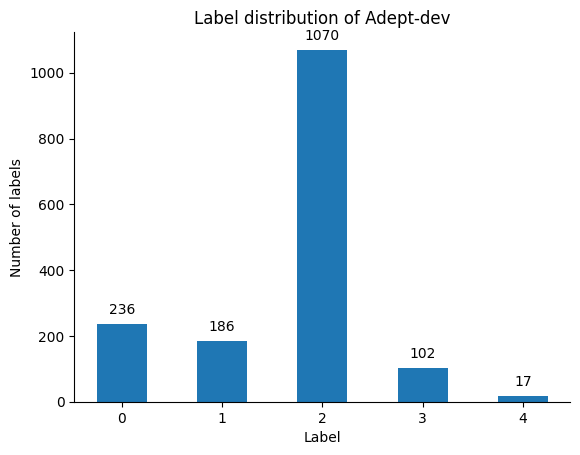

In [10]:
# Label distribution in dev set
plot_adept_dev = adept_dev_df['label'].plot(kind='hist', bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], align='mid', rwidth=0.5, title='Label distribution of Adept-dev')
plt.gca().spines[['top', 'right',]].set_visible(False)

plot_adept_dev.xaxis.set_major_locator(MaxNLocator(integer=True))

plot_adept_dev.set_xlabel('Label')
plot_adept_dev.set_ylabel('Number of labels')

for p in plot_adept_dev.patches:
    if p.get_height() > 0:
        plot_adept_dev.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
plt.savefig('plot_adept_dev.png', dpi=200)

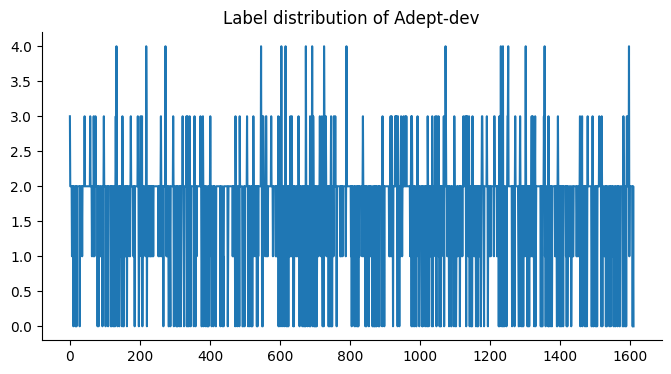

In [11]:
# More details.
adept_dev_df['label'].plot(kind='line', figsize=(8, 4), title='Label distribution of Adept-dev')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.savefig('plot_adept_dev_details.png', dpi=200)

In [12]:
# Load the Adept test set and check the number of instances.
adept_test_df = pd.read_json(ADEPT_TEST_PATH)
adept_test_df

sentence1  \
0     Urine is tested to check for disease.   
1                         News is relevant.   
2                          Rice is stirred.   
3                Plastic is made of carbon.   
4          Sometimes hiking causes a smile.   
...                                     ...   
1607        A heater is used in the winter.   
1608       You use a tin to make ornaments.   
1609          A table is for writing at it.   
1610         A dollar equals four quarters.   
1611              A cake is for a birthday.   

                                        sentence2    modifier     noun  label  \
0      Dark urine is tested to check for disease.        dark    urine      3   
1                         False news is relevant.       false     news      1   
2                          Fresh rice is stirred.       fresh     rice      2   
3             Colorful plastic is made of carbon.    colorful  plastic      2   
4       Sometimes abundant hiking causes a smile.    abundant   hiking      2   
...                                           ...         ...      ...    ...   
1607          A hot heater is used in the winter.         hot   heater      2   
1608  You use a convenient tin to make ornaments.  convenient      tin      2   
1609      A quarterly table is for writing at it.   quarterly    table      0   
1610     A millionth dollar equals four quarters.   millionth   dollar      0   
1611               A fake cake is for a birthday.        fake     cake      0   

        idx  
0      2082  
1     12641  
2     11485  
3       886  
4      5863  
...     ...  
1607  12858  
1608  14438  
1609   4931  
1610   9189  
1611   6191  

[1612 rows x 6 columns]

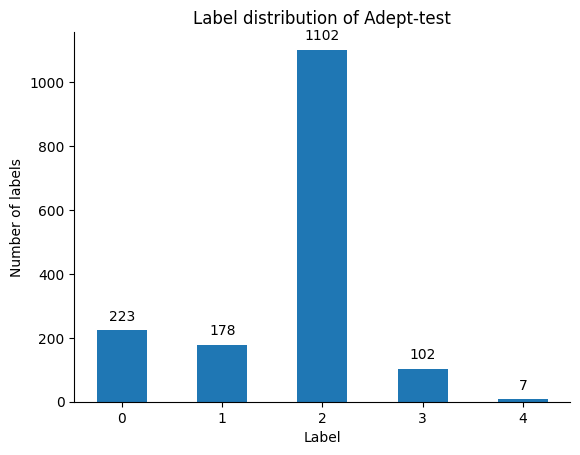

In [13]:
# Label distribution in Adept test set.
plot_adept_test = adept_test_df['label'].plot(kind='hist', bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], align='mid', rwidth=0.5, title='Label distribution of Adept-test')
plt.gca().spines[['top', 'right',]].set_visible(False)

plot_adept_test.xaxis.set_major_locator(MaxNLocator(integer=True))

plot_adept_test.set_xlabel('Label')
plot_adept_test.set_ylabel('Number of labels')

for p in plot_adept_test.patches:
    if p.get_height() > 0:
        plot_adept_test.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
plt.savefig('plot_adept_test.png', dpi=200)

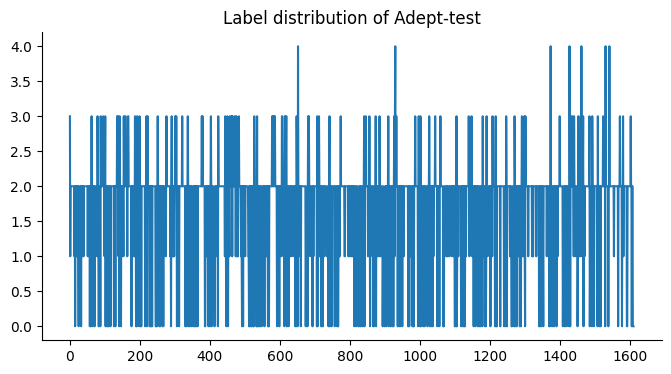

In [14]:
# More in detail
adept_test_df['label'].plot(kind='line', figsize=(8, 4), title='Label distribution of Adept-test')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.savefig('plot_adept_test_details.png', dpi=200)

## Check stopwords
### Investigate the average number of stopwords

In [15]:
# Adept train set
adept_train_df['stopwords'] = adept_train_df['sentence1'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
#print(adept_train_df['stopwords'])
average_train = adept_train_df['stopwords'].mean()
print("Average number of stopwords in adept-train:", average_train)

# Adept dev set
adept_dev_df['stopwords'] = adept_test_df['sentence1'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
#print(adept_test_df['stopwords'])
average_dev = adept_dev_df['stopwords'].mean()
print("Average number of stopwords in adept-dev:", average_dev)

# Adept test set
adept_test_df['stopwords'] = adept_test_df['sentence1'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
#print(adept_test_df['stopwords'])
average_test = adept_test_df['stopwords'].mean()
print("Average number of stopwords in adept-test:", average_test)

Average number of stopwords in adept-train: 2.721998138380391
Average number of stopwords in adept-dev: 2.617628801986344
Average number of stopwords in adept-test: 2.61848635235732


## Check Ngrams (can be further analyzed)
### Invetigate bigram and trigram

In [16]:
def generate_ngrams(text, n):
    """
    Generate n-grams from a given text.
    
    Args:
        text:str  A sequence of words.
        n:int     N of the n-gram.
    Return:
        output:list  A list of n-grams extracted from text.
    """
    
    words = text.split()
    output = list(ngrams(words, n))
    return output

In [17]:
# Adept train set

# bigram
adept_train_df['bigrams'] = adept_train_df['sentence1'].apply(lambda x: generate_ngrams(x, 2))
print(adept_train_df['bigrams'], '\n\n')

# trigrm
adept_train_df['trigrams'] = adept_train_df['sentence1'].apply(lambda x: generate_ngrams(x, 3))
print(adept_train_df['trigrams'])

0        [(The, effect), (effect, of), (of, sleeping), ...
1        [(A, toothbrush), (toothbrush, is), (is, for),...
2                [(A, scene), (scene, is), (is, painted.)]
3        [(A, bone), (bone, breaks), (breaks, a), (a, t...
4        [(A, trip), (trip, causes), (causes, a), (a, h...
                               ...                        
12887    [(A, pub), (pub, is), (is, for), (for, corned)...
12888    [(Lidocaine, is), (is, used), (used, to), (to,...
12889    [(An, arm), (arm, is), (is, used), (used, for)...
12890    [(A, farmer), (farmer, shakes), (shakes, a), (...
12891    [(A, closet), (closet, is), (is, used), (used,...
Name: bigrams, Length: 12892, dtype: object 


0        [(The, effect, of), (effect, of, sleeping), (o...
1        [(A, toothbrush, is), (toothbrush, is, for), (...
2                  [(A, scene, is), (scene, is, painted.)]
3        [(A, bone, breaks), (bone, breaks, a), (breaks...
4        [(A, trip, causes), (trip, causes, a), (causes...
         

In [18]:
# Adept dev set

# bigram
adept_dev_df['bigrams'] = adept_dev_df['sentence1'].apply(lambda x: generate_ngrams(x, 2))
print(adept_dev_df['bigrams'], '\n\n')
# trigrm
adept_dev_df['trigrams'] = adept_dev_df['sentence1'].apply(lambda x: generate_ngrams(x, 3))
print(adept_dev_df['trigrams'])

0       [(An, ottoman), (ottoman, is), (is, for), (for...
1       [(A, butcher), (butcher, bones), (bones, a), (...
2       [(Creditors, lends), (lends, money), (money, t...
3       [(You, use), (use, a), (a, lobby), (lobby, to)...
4       [(You, use), (use, a), (a, tenor), (tenor, to)...
                              ...                        
1606    [(A, name), (name, is), (is, for), (for, ident...
1607                [(A, bush), (bush, is), (is, alive.)]
1608    [(A, trumpet), (trumpet, is), (is, for), (for,...
1609    [(Height, matters), (matters, in), (in, basket...
1610    [(A, repairman), (repairman, attempts), (attem...
Name: bigrams, Length: 1611, dtype: object 


0       [(An, ottoman, is), (ottoman, is, for), (is, f...
1       [(A, butcher, bones), (butcher, bones, a), (bo...
2       [(Creditors, lends, money), (lends, money, to)...
3       [(You, use, a), (use, a, lobby), (a, lobby, to...
4       [(You, use, a), (use, a, tenor), (a, tenor, to...
                          

In [19]:
# Adept test set

# bigram
adept_test_df['bigrams'] = adept_test_df['sentence1'].apply(lambda x: generate_ngrams(x, 2))
print(adept_test_df['bigrams'], '\n\n')
# trigrm
adept_test_df['trigrams'] = adept_test_df['sentence1'].apply(lambda x: generate_ngrams(x, 3))
print(adept_test_df['trigrams'])

0       [(Urine, is), (is, tested), (tested, to), (to,...
1                           [(News, is), (is, relevant.)]
2                            [(Rice, is), (is, stirred.)]
3       [(Plastic, is), (is, made), (made, of), (of, c...
4       [(Sometimes, hiking), (hiking, causes), (cause...
                              ...                        
1607    [(A, heater), (heater, is), (is, used), (used,...
1608    [(You, use), (use, a), (a, tin), (tin, to), (t...
1609    [(A, table), (table, is), (is, for), (for, wri...
1610    [(A, dollar), (dollar, equals), (equals, four)...
1611    [(A, cake), (cake, is), (is, for), (for, a), (...
Name: bigrams, Length: 1612, dtype: object 


0       [(Urine, is, tested), (is, tested, to), (teste...
1                                 [(News, is, relevant.)]
2                                  [(Rice, is, stirred.)]
3       [(Plastic, is, made), (is, made, of), (made, o...
4       [(Sometimes, hiking, causes), (hiking, causes,...
                          

## Check POS
### Investigar POS distribution and ranking pos taggers

In [20]:
# POS taggger function
def tokenize_and_tag(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

# Count the frequency of each PoS tag
def count_pos(row):
    # Extracting the POS tags and counting them
    tags = [tag for word, tag in row]
    return Counter(tags)

# Apply the function to each row in the column
adept_train_df['tagged_tokens'] = adept_train_df['sentence1'].apply(tokenize_and_tag)
adept_dev_df['tagged_tokens'] = adept_dev_df['sentence1'].apply(tokenize_and_tag)
adept_test_df['tagged_tokens'] = adept_test_df['sentence1'].apply(tokenize_and_tag)

Counter({'NN': 20050, 'DT': 14035, '.': 12893, 'VBZ': 9924, 'IN': 8058, 'NNS': 4662, 'VBG': 3716, 'JJ': 3131, 'VBN': 2951, 'TO': 2671, 'VB': 2470, 'PRP': 1885, 'VBP': 1879, 'NNP': 1463, 'RB': 750, 'PRP$': 610, 'CC': 356, 'RP': 273, 'CD': 261, 'MD': 209, 'WDT': 141, 'JJR': 102, 'POS': 83, ',': 66, 'WRB': 50, 'RBR': 43, 'VBD': 41, 'WP': 31, 'JJS': 21, 'RBS': 6, ':': 5, '``': 3, '(': 2, ')': 2, 'NNPS': 2, "''": 2, 'FW': 1, 'WP$': 1, 'PDT': 1})


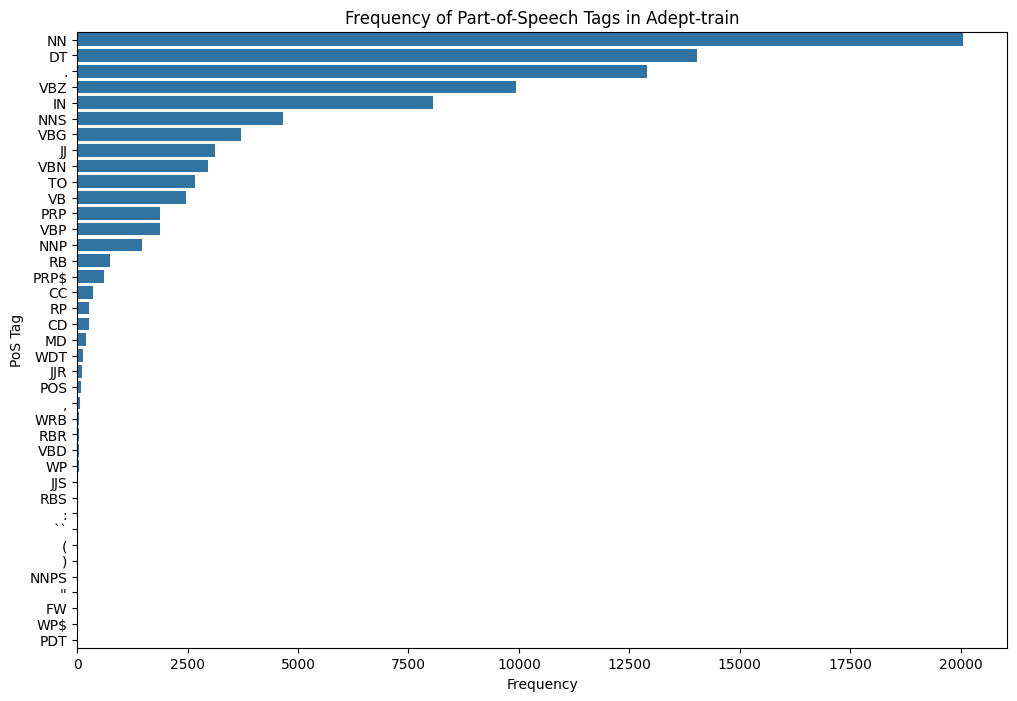

In [21]:
# Adept train set

# Apply the function to each row
adept_train_df['pos_counts'] = adept_train_df['tagged_tokens'].apply(count_pos)
# Aggregate all counts
total_pos_counts_train = sum(adept_train_df['pos_counts'], Counter())
print(total_pos_counts_train)

# Convert to DataFrame for plotting
pos_counts_train_df = pd.DataFrame(total_pos_counts_train.items(), columns=['PoS_Tag', 'Frequency'])
pos_counts_train_df = pos_counts_train_df.sort_values(by='Frequency', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='PoS_Tag', data=pos_counts_train_df)
plt.title('Frequency of Part-of-Speech Tags in Adept-train')
plt.xlabel('Frequency')
plt.ylabel('PoS Tag')
plt.show()

Counter({'NN': 2488, 'DT': 1744, '.': 1611, 'VBZ': 1231, 'IN': 936, 'NNS': 598, 'VBG': 420, 'JJ': 380, 'VBN': 361, 'TO': 323, 'VB': 304, 'VBP': 220, 'PRP': 216, 'NNP': 190, 'RB': 94, 'PRP$': 81, 'RP': 44, 'MD': 33, 'CC': 33, 'CD': 31, 'JJR': 18, 'WDT': 17, ',': 14, 'POS': 14, 'VBD': 5, 'WRB': 3, 'RBR': 3, 'JJS': 3, 'WP': 2, 'SYM': 1, "''": 1})


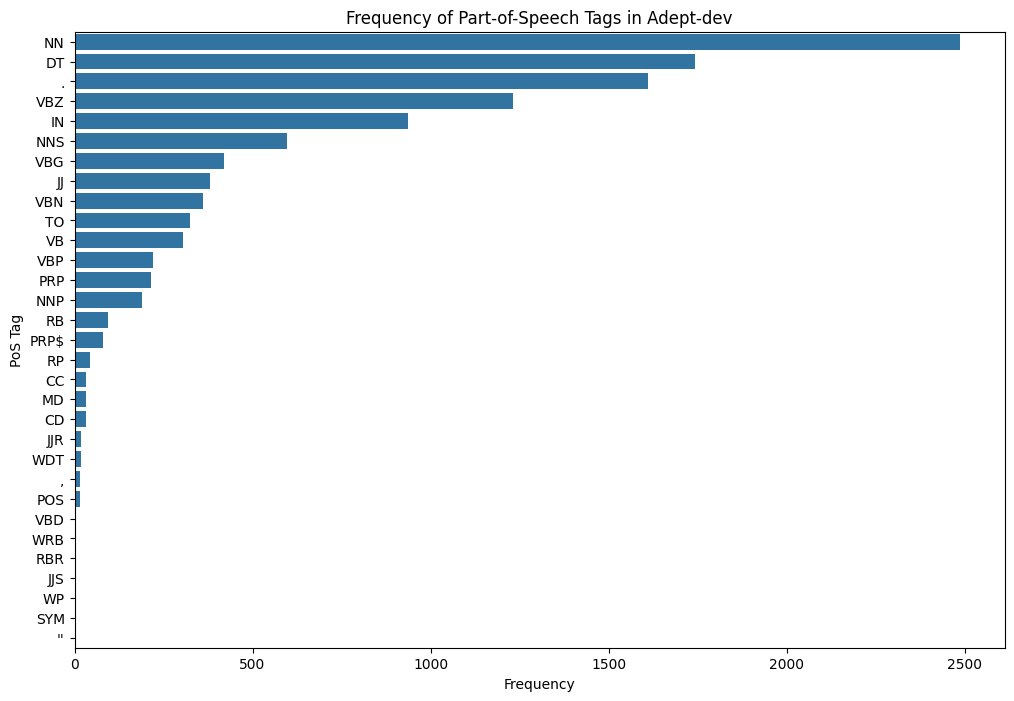

In [22]:
# Adept dev set

# Apply the function to each row
adept_dev_df['pos_counts'] = adept_dev_df['tagged_tokens'].apply(count_pos)
# Aggregate all counts
total_pos_counts_dev = sum(adept_dev_df['pos_counts'], Counter())
print(total_pos_counts_dev)

# Convert to DataFrame for plotting
pos_counts_dev_df = pd.DataFrame(total_pos_counts_dev.items(), columns=['PoS_Tag', 'Frequency'])
pos_counts_dev_df = pos_counts_dev_df.sort_values(by='Frequency', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='PoS_Tag', data=pos_counts_dev_df)
plt.title('Frequency of Part-of-Speech Tags in Adept-dev')
plt.xlabel('Frequency')
plt.ylabel('PoS Tag')
plt.show()

Counter({'NN': 2446, 'DT': 1705, '.': 1612, 'VBZ': 1203, 'IN': 931, 'NNS': 619, 'VBG': 422, 'JJ': 404, 'VBN': 360, 'TO': 337, 'VB': 319, 'PRP': 252, 'VBP': 248, 'NNP': 179, 'RB': 90, 'PRP$': 80, 'CC': 37, 'CD': 37, 'RP': 35, 'MD': 32, 'JJR': 12, 'WDT': 11, ',': 11, 'WRB': 8, 'POS': 7, 'RBR': 6, 'VBD': 3, 'PDT': 1, 'RBS': 1, 'WP': 1})


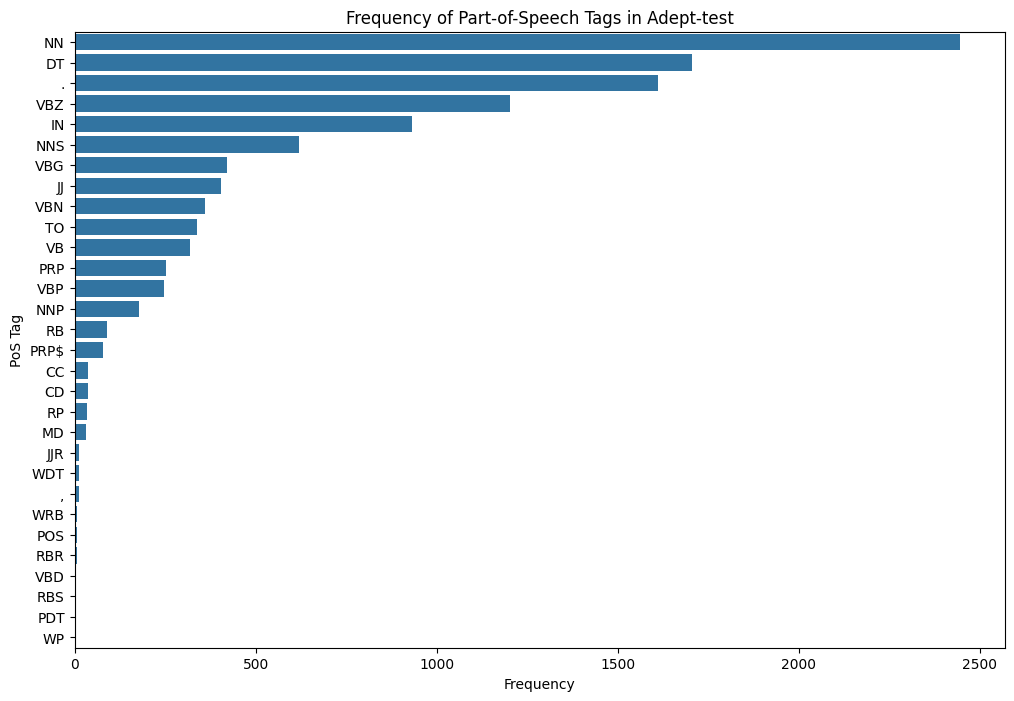

In [23]:
# Adept test set

# Apply the function to each row
adept_test_df['pos_counts'] = adept_test_df['tagged_tokens'].apply(count_pos)
# Aggregate all counts
total_pos_counts_test = sum(adept_test_df['pos_counts'], Counter())
print(total_pos_counts_test)

# Convert to DataFrame for plotting
pos_counts_test_df = pd.DataFrame(total_pos_counts_test.items(), columns=['PoS_Tag', 'Frequency'])
pos_counts_test_df = pos_counts_test_df.sort_values(by='Frequency', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='PoS_Tag', data=pos_counts_test_df)
plt.title('Frequency of Part-of-Speech Tags in Adept-test')
plt.xlabel('Frequency')
plt.ylabel('PoS Tag')
plt.show()

# **Ellie** (ellipses)
### has both binary and multiclass-labels
### only for evaluation

## Have a basic grasp of the data
### Investigate Lavel distribution

In [24]:
ellie_df = pd.read_csv(ELLIE_PATH + 'ELLie-reformatted.csv')
ellie_df

ID         Condition                                           Sentence  \
0      1             T – T  The photographer used the camera, and the repo...   
1      1            T – AT  The photographer used the camera, and the butc...   
2      1            AT – T  The grandfather used the camera, and the repor...   
3      1           AT – AT  The grandfather used the camera, and the butch...   
4      1  T – SP violation  The photographer used the camera, and the bike...   
..   ...               ...                                                ...   
570  115             T – T  The tourist packed his bags before departure, ...   
571  115            T – AT  The tourist packed his bags before departure, ...   
572  115            AT – T  The tourist packed his bags before the meeting...   
573  115           AT – AT  The tourist packed his bags before the meeting...   
574  115  T – SP violation  The tourist packed his bags before departure, ...   

       Construction Semantic_Role binary-labels multiclass-labels  
0       VP-ellipsis         Agent     plausible  highly-plausible  
1       VP-ellipsis         Agent     plausible         plausible  
2       VP-ellipsis         Agent     plausible    less-plausible  
3       VP-ellipsis         Agent     plausible    less-plausible  
4       VP-ellipsis         Agent   implausible       implausible  
..              ...           ...           ...               ...  
570  Pseudo-gapping          Time     plausible  highly-plausible  
571  Pseudo-gapping          Time     plausible         plausible  
572  Pseudo-gapping          Time     plausible    less-plausible  
573  Pseudo-gapping          Time     plausible    less-plausible  
574  Pseudo-gapping          Time   implausible       implausible  

[575 rows x 7 columns]

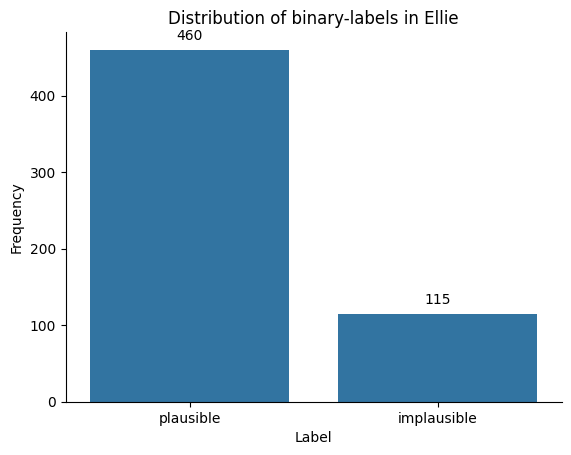

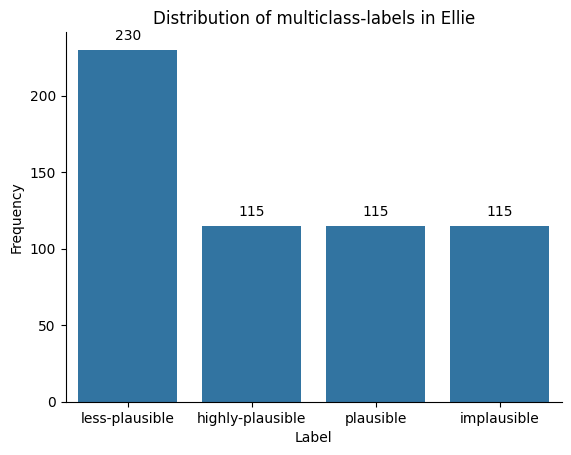

In [25]:
# binary Label distribution
binary_label_counts = ellie_df['binary-labels'].value_counts()
plt.gca().spines[['top', 'right',]].set_visible(False)

# Create the bar plot
plot_binary = sns.barplot(x=binary_label_counts.index, y=binary_label_counts.values)
for p in plot_binary.patches:
    if p.get_height() > 0:
        plot_binary.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of binary-labels in Ellie')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


# multiclass Label distribution
multiclass_label_counts = ellie_df['multiclass-labels'].value_counts()
plt.gca().spines[['top', 'right',]].set_visible(False)

# Create the bar plot
plot_multiclass = sns.barplot(x=multiclass_label_counts.index, y=multiclass_label_counts.values)
for p in plot_multiclass.patches:
      if p.get_height() > 0:
            plot_multiclass.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of multiclass-labels in Ellie')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

## Check stopwords

In [26]:
ellie_df['stopwords'] = ellie_df['Sentence'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
print(ellie_df['stopwords'])

ellie_average = ellie_df['stopwords'].mean()
print("Average number of stopwords in Ellie:", ellie_average)

0      5
1      5
2      5
3      5
4      5
      ..
570    8
571    8
572    9
573    9
574    8
Name: stopwords, Length: 575, dtype: int64
Average number of stopwords in Ellie: 7.259130434782609


## Check Ngrams (can be further analyzed)

In [27]:
# Example for bigrams
ellie_df['bigrams'] = ellie_df['Sentence'].apply(lambda x: generate_ngrams(x, 2))
print(ellie_df['bigrams'])

# Example for trigrams
ellie_df['trigrams'] = ellie_df['Sentence'].apply(lambda x: generate_ngrams(x, 3))
print(ellie_df['trigrams'])

0      [(The, photographer), (photographer, used), (u...
1      [(The, photographer), (photographer, used), (u...
2      [(The, grandfather), (grandfather, used), (use...
3      [(The, grandfather), (grandfather, used), (use...
4      [(The, photographer), (photographer, used), (u...
                             ...                        
570    [(The, tourist), (tourist, packed), (packed, h...
571    [(The, tourist), (tourist, packed), (packed, h...
572    [(The, tourist), (tourist, packed), (packed, h...
573    [(The, tourist), (tourist, packed), (packed, h...
574    [(The, tourist), (tourist, packed), (packed, h...
Name: bigrams, Length: 575, dtype: object
0      [(The, photographer, used), (photographer, use...
1      [(The, photographer, used), (photographer, use...
2      [(The, grandfather, used), (grandfather, used,...
3      [(The, grandfather, used), (grandfather, used,...
4      [(The, photographer, used), (photographer, use...
                             ...              

In [28]:
# Show the updated Ellie dataframe.
ellie_df

ID         Condition                                           Sentence  \
0      1             T – T  The photographer used the camera, and the repo...   
1      1            T – AT  The photographer used the camera, and the butc...   
2      1            AT – T  The grandfather used the camera, and the repor...   
3      1           AT – AT  The grandfather used the camera, and the butch...   
4      1  T – SP violation  The photographer used the camera, and the bike...   
..   ...               ...                                                ...   
570  115             T – T  The tourist packed his bags before departure, ...   
571  115            T – AT  The tourist packed his bags before departure, ...   
572  115            AT – T  The tourist packed his bags before the meeting...   
573  115           AT – AT  The tourist packed his bags before the meeting...   
574  115  T – SP violation  The tourist packed his bags before departure, ...   

       Construction Semantic_Role binary-labels multiclass-labels  stopwords  \
0       VP-ellipsis         Agent     plausible  highly-plausible          5   
1       VP-ellipsis         Agent     plausible         plausible          5   
2       VP-ellipsis         Agent     plausible    less-plausible          5   
3       VP-ellipsis         Agent     plausible    less-plausible          5   
4       VP-ellipsis         Agent   implausible       implausible          5   
..              ...           ...           ...               ...        ...   
570  Pseudo-gapping          Time     plausible  highly-plausible          8   
571  Pseudo-gapping          Time     plausible         plausible          8   
572  Pseudo-gapping          Time     plausible    less-plausible          9   
573  Pseudo-gapping          Time     plausible    less-plausible          9   
574  Pseudo-gapping          Time   implausible       implausible          8   

                                               bigrams  \
0    [(The, photographer), (photographer, used), (u...   
1    [(The, photographer), (photographer, used), (u...   
2    [(The, grandfather), (grandfather, used), (use...   
3    [(The, grandfather), (grandfather, used), (use...   
4    [(The, photographer), (photographer, used), (u...   
..                                                 ...   
570  [(The, tourist), (tourist, packed), (packed, h...   
571  [(The, tourist), (tourist, packed), (packed, h...   
572  [(The, tourist), (tourist, packed), (packed, h...   
573  [(The, tourist), (tourist, packed), (packed, h...   
574  [(The, tourist), (tourist, packed), (packed, h...   

                                              trigrams  
0    [(The, photographer, used), (photographer, use...  
1    [(The, photographer, used), (photographer, use...  
2    [(The, grandfather, used), (grandfather, used,...  
3    [(The, grandfather, used), (grandfather, used,...  
4    [(The, photographer, used), (photographer, use...  
..                                                 ...  
570  [(The, tourist, packed), (tourist, packed, his...  
571  [(The, tourist, packed), (tourist, packed, his...  
572  [(The, tourist, packed), (tourist, packed, his...  
573  [(The, tourist, packed), (tourist, packed, his...  
574  [(The, tourist, packed), (tourist, packed, his...  

[575 rows x 10 columns]

## Check Part-Of-Speech (POS)

In [29]:
# Apply the function to each row in the column
ellie_df['tagged_tokens'] = ellie_df['Sentence'].apply(tokenize_and_tag)

In [30]:
# Show the updated Ellie dataframe.
ellie_df

ID         Condition                                           Sentence  \
0      1             T – T  The photographer used the camera, and the repo...   
1      1            T – AT  The photographer used the camera, and the butc...   
2      1            AT – T  The grandfather used the camera, and the repor...   
3      1           AT – AT  The grandfather used the camera, and the butch...   
4      1  T – SP violation  The photographer used the camera, and the bike...   
..   ...               ...                                                ...   
570  115             T – T  The tourist packed his bags before departure, ...   
571  115            T – AT  The tourist packed his bags before departure, ...   
572  115            AT – T  The tourist packed his bags before the meeting...   
573  115           AT – AT  The tourist packed his bags before the meeting...   
574  115  T – SP violation  The tourist packed his bags before departure, ...   

       Construction Semantic_Role binary-labels multiclass-labels  stopwords  \
0       VP-ellipsis         Agent     plausible  highly-plausible          5   
1       VP-ellipsis         Agent     plausible         plausible          5   
2       VP-ellipsis         Agent     plausible    less-plausible          5   
3       VP-ellipsis         Agent     plausible    less-plausible          5   
4       VP-ellipsis         Agent   implausible       implausible          5   
..              ...           ...           ...               ...        ...   
570  Pseudo-gapping          Time     plausible  highly-plausible          8   
571  Pseudo-gapping          Time     plausible         plausible          8   
572  Pseudo-gapping          Time     plausible    less-plausible          9   
573  Pseudo-gapping          Time     plausible    less-plausible          9   
574  Pseudo-gapping          Time   implausible       implausible          8   

                                               bigrams  \
0    [(The, photographer), (photographer, used), (u...   
1    [(The, photographer), (photographer, used), (u...   
2    [(The, grandfather), (grandfather, used), (use...   
3    [(The, grandfather), (grandfather, used), (use...   
4    [(The, photographer), (photographer, used), (u...   
..                                                 ...   
570  [(The, tourist), (tourist, packed), (packed, h...   
571  [(The, tourist), (tourist, packed), (packed, h...   
572  [(The, tourist), (tourist, packed), (packed, h...   
573  [(The, tourist), (tourist, packed), (packed, h...   
574  [(The, tourist), (tourist, packed), (packed, h...   

                                              trigrams  \
0    [(The, photographer, used), (photographer, use...   
1    [(The, photographer, used), (photographer, use...   
2    [(The, grandfather, used), (grandfather, used,...   
3    [(The, grandfather, used), (grandfather, used,...   
4    [(The, photographer, used), (photographer, use...   
..                                                 ...   
570  [(The, tourist, packed), (tourist, packed, his...   
571  [(The, tourist, packed), (tourist, packed, his...   
572  [(The, tourist, packed), (tourist, packed, his...   
573  [(The, tourist, packed), (tourist, packed, his...   
574  [(The, tourist, packed), (tourist, packed, his...   

                                         tagged_tokens  
0    [(The, DT), (photographer, NN), (used, VBD), (...  
1    [(The, DT), (photographer, NN), (used, VBD), (...  
2    [(The, DT), (grandfather, NN), (used, VBD), (t...  
3    [(The, DT), (grandfather, NN), (used, VBD), (t...  
4    [(The, DT), (photographer, NN), (used, VBD), (...  
..                                                 ...  
570  [(The, DT), (tourist, NN), (packed, VBD), (his...  
571  [(The, DT), (tourist, NN), (packed, VBD), (his...  
572  [(The, DT), (tourist, NN), (packed, VBD), (his...  
573  [(The, DT), (tourist, NN), (packed, VBD), (his...  
574  [(The, DT), (tourist, NN), (packed, VBD), (his

Counter({'NN': 2439, 'DT': 2195, 'IN': 652, ',': 575, '.': 573, 'CC': 537, 'VBD': 408, 'MD': 338, 'VBZ': 171, 'VB': 157, 'RB': 137, 'NNS': 128, 'JJ': 119, 'VBP': 69, 'VBG': 60, 'PRP$': 52, 'PRP': 50, 'NNP': 44, 'WP': 43, 'VBN': 10, 'WRB': 7, 'JJS': 5, 'TO': 5})


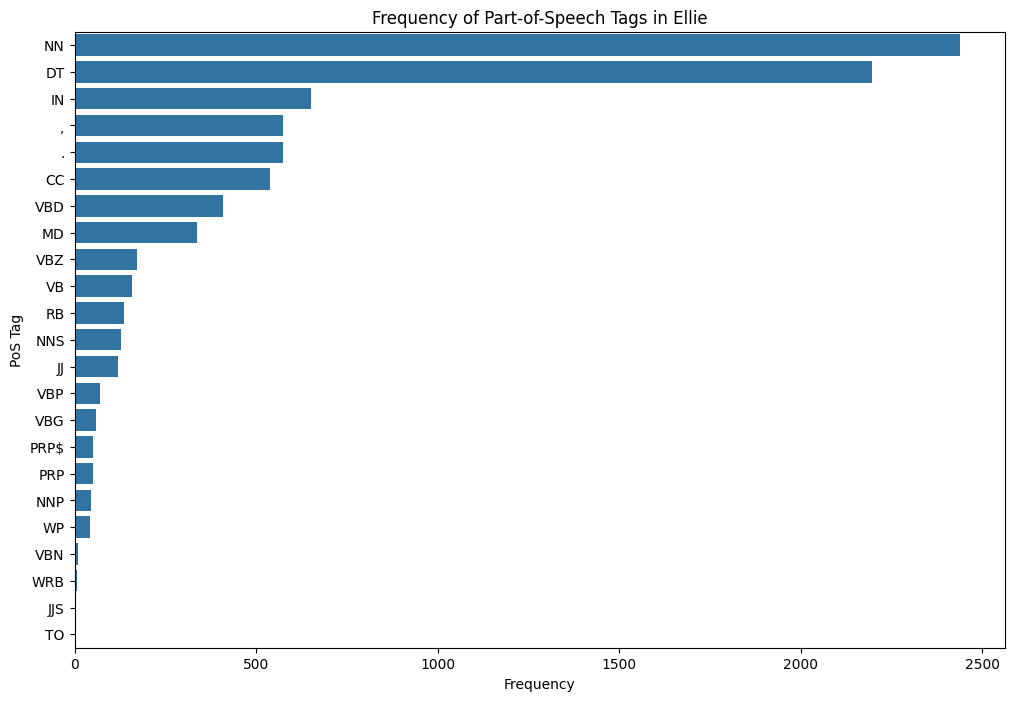

<Figure size 640x480 with 0 Axes>

In [31]:
# Apply the function to each row
ellie_df['pos_counts'] = ellie_df['tagged_tokens'].apply(count_pos)

# Aggregate all counts
total_pos_count_ellie = sum(ellie_df['pos_counts'], Counter())
print(total_pos_count_ellie)

# Convert to DataFrame for plotting
pos_counts_ellie_df = pd.DataFrame(total_pos_count_ellie.items(), columns=['PoS_Tag', 'Frequency'])
pos_counts_ellie_df = pos_counts_ellie_df.sort_values(by='Frequency', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='PoS_Tag', data=pos_counts_ellie_df)
plt.title('Frequency of Part-of-Speech Tags in Ellie')
plt.xlabel('Frequency')
plt.ylabel('PoS Tag')
plt.show()

plt.savefig('plot_ellie_pos.png', dpi=200)

# **PAP** (filtered/unfiltered triple + binary/multiclass classification)
## Using filtered binary PAP datasets

In [32]:
# Read data
pap_train_df = pd.read_csv(PAP_TRAIN_FILTERED_PATH)
pap_dev_df = pd.read_csv(PAP_DEV_FILTERED_PATH)
pap_test_df = pd.read_csv(PAP_TEST_FILTERED_PATH)

In [33]:
pap_train_df

text original_label  label
0            group releases album      plausible      1
1            rich unfold interest    implausible      0
2              fruit reduces risk      plausible      1
3        market drives innovation      plausible      1
4      firefighter works schedule      plausible      1
...                           ...            ...    ...
1381   sailor stabilizes daughter    implausible      1
1382    area recognizes authority      plausible      1
1383  basis recognizes individual      plausible      1
1384                fin ruins bay    implausible      0
1385     pollution affects health      plausible      1

[1386 rows x 3 columns]

## Wordcloud
### Investigate the most frequent words associated with plausible label and implausible label respectively

In [34]:
# Filter the DataFrame for each label
train_text_0 = ' '.join(pap_train_df[pap_train_df['label'] == 0]['text'].astype(str))
train_text_1 = ' '.join(pap_train_df[pap_train_df['label'] == 1]['text'].astype(str))

dev_text_0 = ' '.join(pap_dev_df[pap_dev_df['label'] == 0]['text'].astype(str))
dev_text_1 = ' '.join(pap_dev_df[pap_dev_df['label'] == 1]['text'].astype(str))

test_text_0 = ' '.join(pap_test_df[pap_test_df['label'] == 0]['text'].astype(str))
test_text_1 = ' '.join(pap_test_df[pap_test_df['label'] == 1]['text'].astype(str))

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

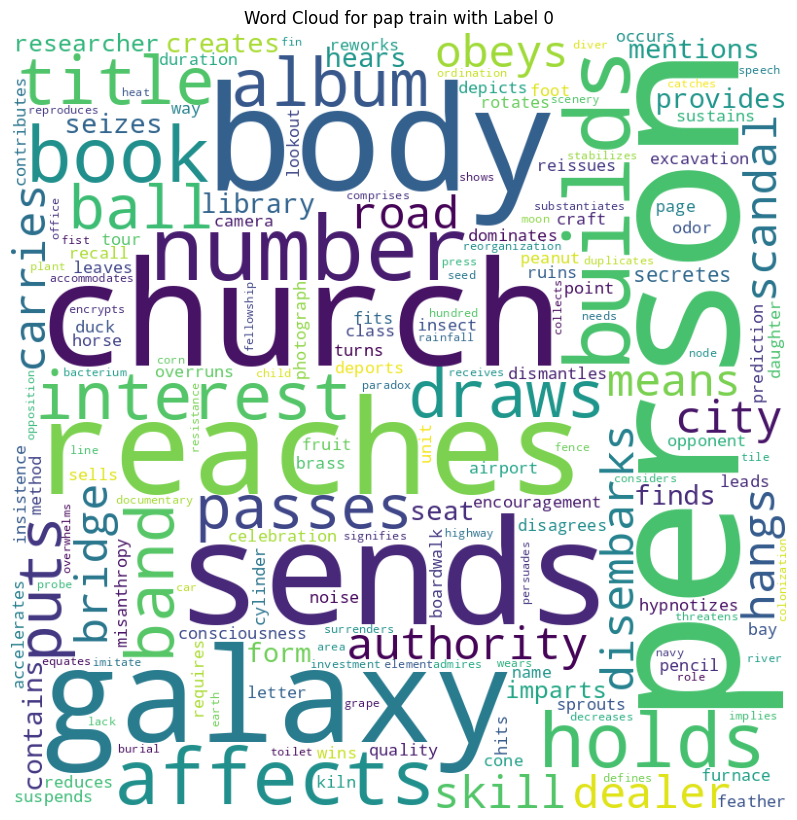

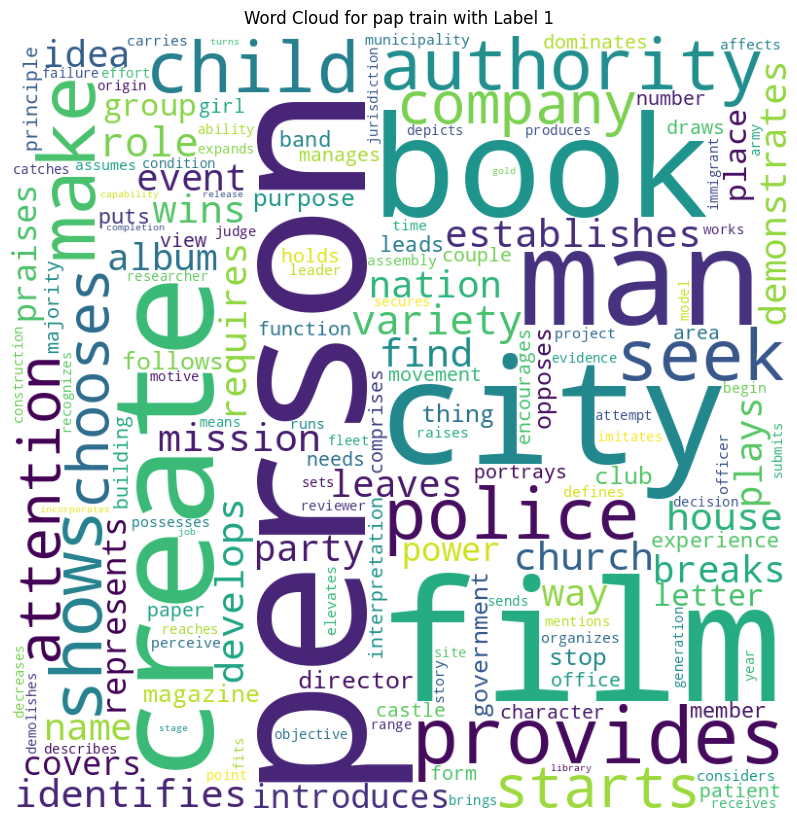

In [35]:
# Generate train word cloud for label 0 and 1
generate_wordcloud(train_text_0, 'Word Cloud for pap train with Label 0')
generate_wordcloud(train_text_1, 'Word Cloud for pap train with Label 1')

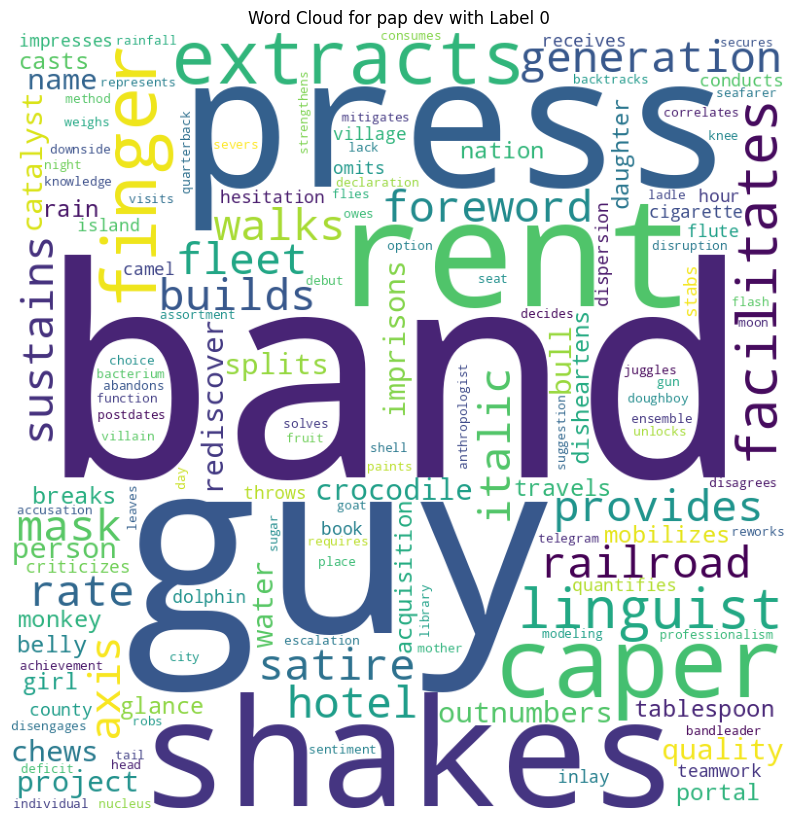

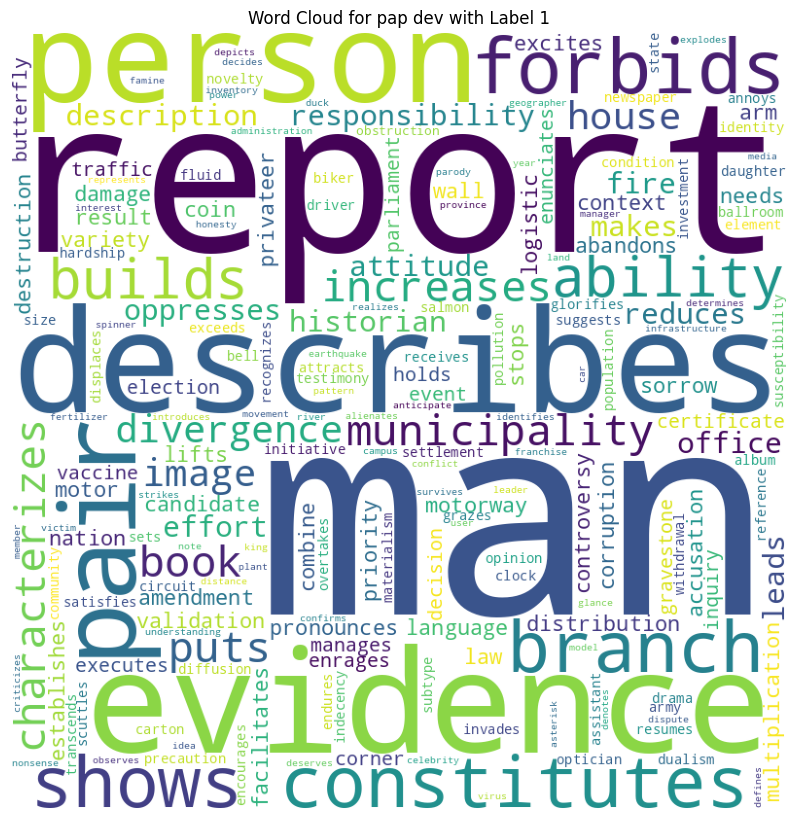

In [36]:
# Generate dev word cloud for label 0 and 1
generate_wordcloud(dev_text_0, 'Word Cloud for pap dev with Label 0')
generate_wordcloud(dev_text_1, 'Word Cloud for pap dev with Label 1')

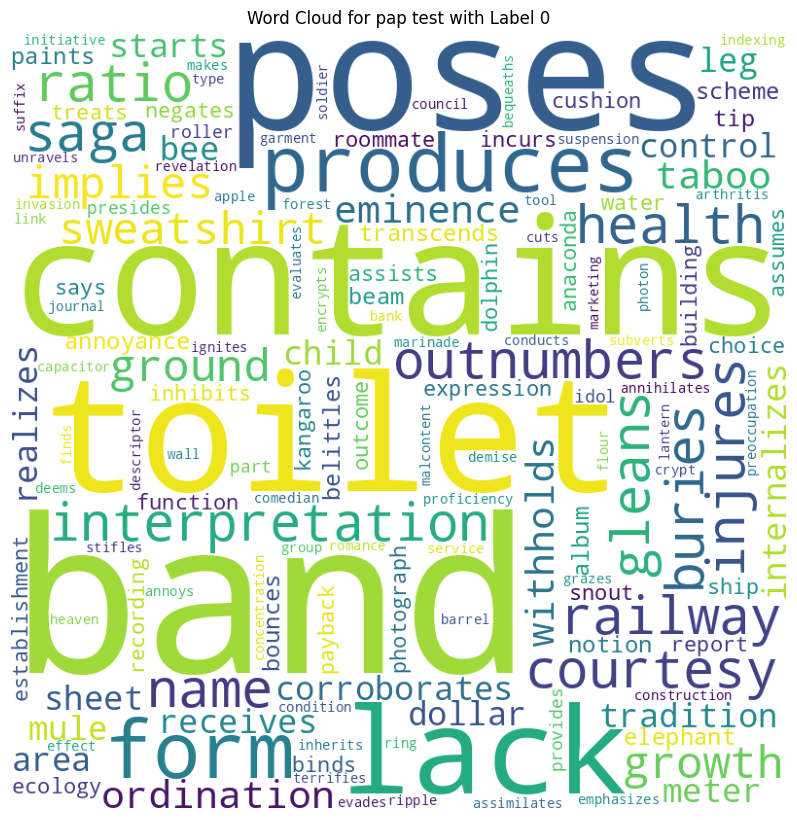

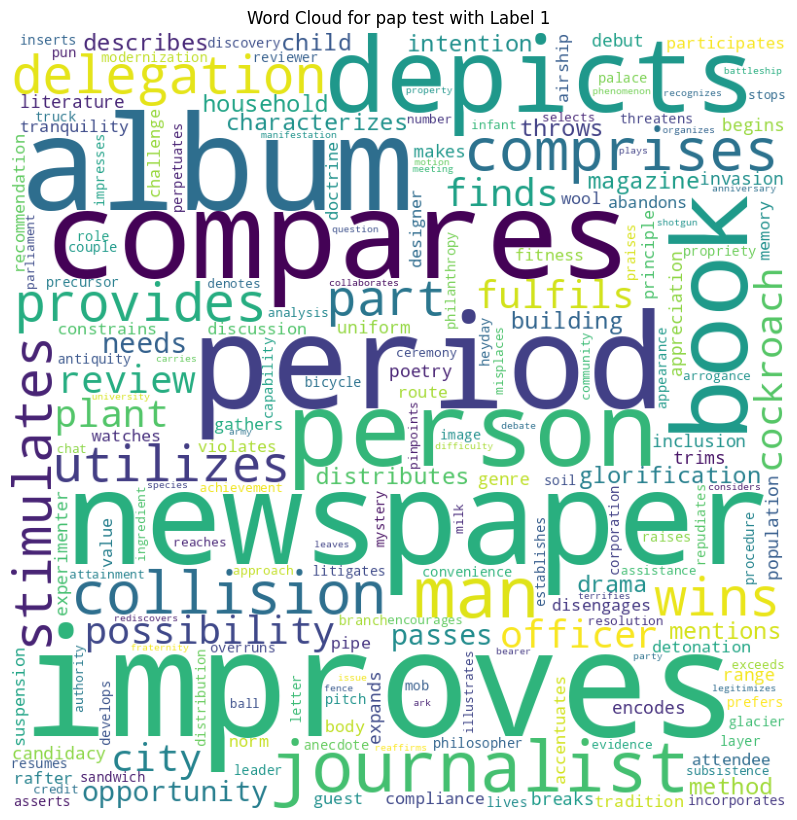

In [37]:
# Generate test word cloud for label 0 and 1
generate_wordcloud(test_text_0, 'Word Cloud for pap test with Label 0')
generate_wordcloud(test_text_1, 'Word Cloud for pap test with Label 1')

## Semantic Analysis

### Use Gensim to explore the semantic similarities between words in the dataset. This could help identify whether certain types of verbs or objects are more associated with plausible or implausible labels.

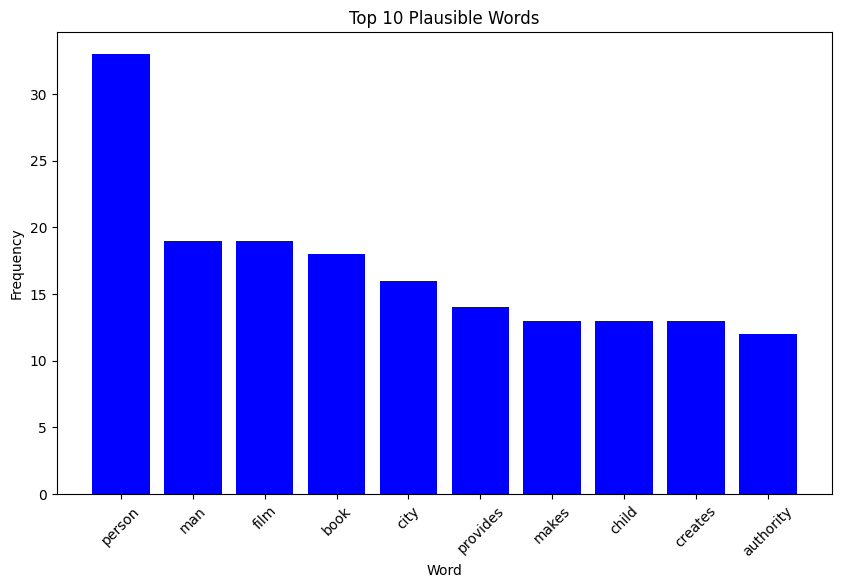

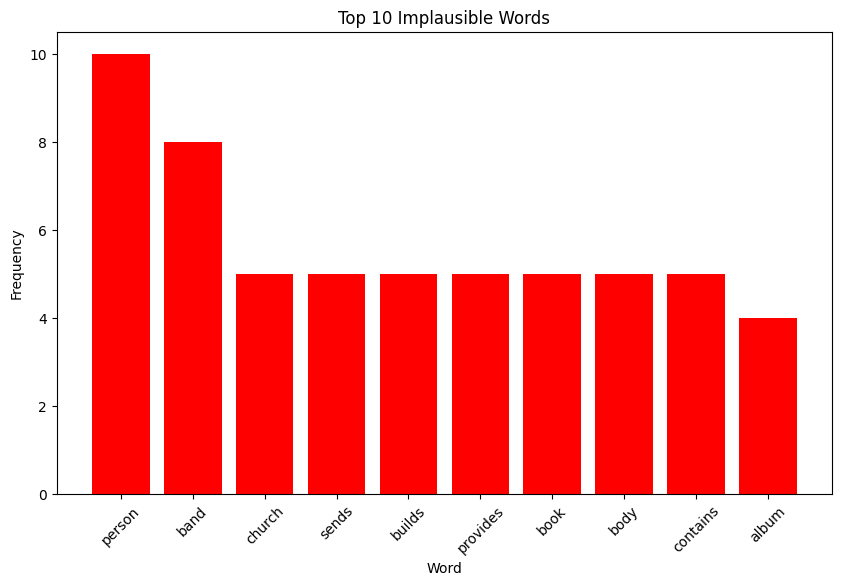

In [38]:
# Explore the most frequent (im)plausible words in the datasets

# Aggregate text by label
combined_df = pd.concat([pap_train_df, pap_dev_df, pap_test_df], ignore_index=True)
plausible_text = ' '.join(combined_df[combined_df['label'] == 1]['text'].astype(str))
implausible_text = ' '.join(combined_df[combined_df['label'] == 0]['text'].astype(str))

# Tokenize and count
plausible_counts = Counter(word_tokenize(plausible_text))
implausible_counts = Counter(word_tokenize(implausible_text))

# Get most common words
top_plausible = plausible_counts.most_common(10)
top_implausible = implausible_counts.most_common(10)

# Convert the most common words data into DataFrame
df_plausible = pd.DataFrame(top_plausible, columns=['Word', 'Frequency'])
df_implausible = pd.DataFrame(top_implausible, columns=['Word', 'Frequency'])

# Plot for Plausible Words
plt.figure(figsize=(10, 6))
plt.bar(df_plausible['Word'], df_plausible['Frequency'], color='blue')
plt.title('Top 10 Plausible Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot for Implausible Words
plt.figure(figsize=(10, 6))
plt.bar(df_implausible['Word'], df_implausible['Frequency'], color='red')
plt.title('Top 10 Implausible Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Use word2vec model to find similarities between top words in different categories

# Tokenize each sentence into words
tokenized_sentences = [word_tokenize(sentence) for sentence in combined_df['text']]

# Train a model on the triples
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save(CACHE_PATH + 'pap_similarity.model')

# Use the model
for word_p, _ in top_plausible:
    for word_i, _ in top_implausible:
        similarity = model.wv.similarity(word_p, word_i)
        print(f"Similarity between '{word_p}' and '{word_i}': {similarity}")

Similarity between 'person' and 'person': 1.0
Similarity between 'person' and 'band': 0.09466183185577393
Similarity between 'person' and 'church': 0.06461741030216217
Similarity between 'person' and 'sends': 0.17392128705978394
Similarity between 'person' and 'builds': -0.13948015868663788
Similarity between 'person' and 'provides': -0.03617784008383751
Similarity between 'person' and 'book': 0.000107569620013237
Similarity between 'person' and 'body': 0.01241935696452856
Similarity between 'person' and 'contains': 0.07627728581428528
Similarity between 'person' and 'album': 0.042423561215400696
Similarity between 'man' and 'person': -0.10102707147598267
Similarity between 'man' and 'band': 0.05229942873120308
Similarity between 'man' and 'church': -0.14914576709270477
Similarity between 'man' and 'sends': -0.018253007903695107
Similarity between 'man' and 'builds': -0.08917775005102158
Similarity between 'man' and 'provides': 0.13929592072963715
Similarity between 'man' and 'book': 0

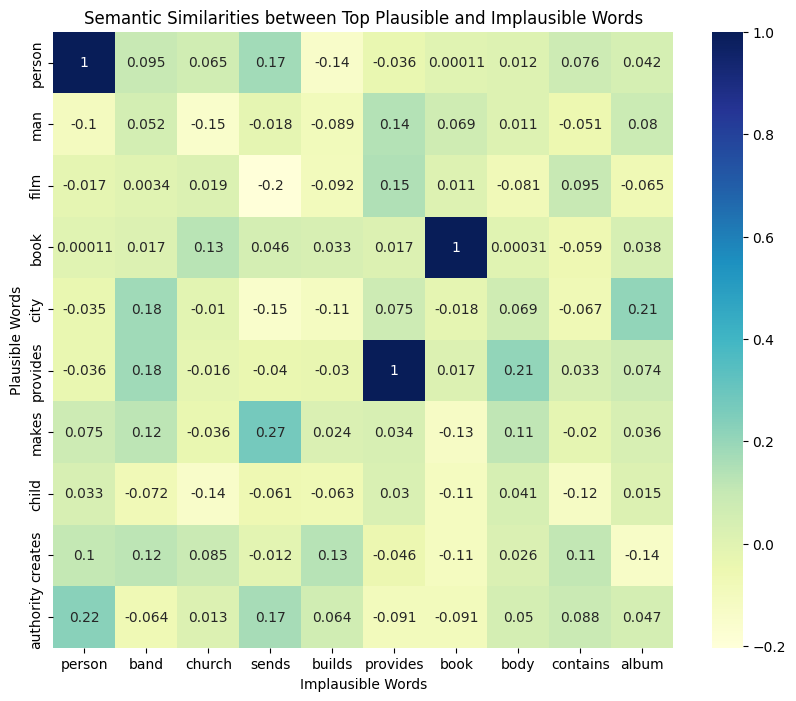

In [40]:
# Creat a heatmap to visualize the similarities between top words

# Assuming top_plausible and top_implausible are lists of tuples (word, frequency)
plausible_words = [word for word, _ in top_plausible]
implausible_words = [word for word, _ in top_implausible]

# Create a matrix of similarities
similarity_matrix = np.zeros((len(plausible_words), len(implausible_words)))

for i, word_p in enumerate(plausible_words):
    for j, word_i in enumerate(implausible_words):
        similarity_matrix[i, j] = model.wv.similarity(word_p, word_i)

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(similarity_matrix, index=plausible_words, columns=implausible_words)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.title("Semantic Similarities between Top Plausible and Implausible Words")
plt.xlabel("Implausible Words")
plt.ylabel("Plausible Words")
plt.show()

# **pep-3k** (triple + binary classification)

In [41]:
# Read data
# pep_train_df = pd.read_csv('/content/drive/MyDrive/SemanticPlausibility/datasets/pep-3k/train-dev-test-split/train.csv')
pep_train_df = pd.read_csv(PEP_TRAIN_PATH)
# pep_dev_df = pd.read_csv('/content/drive/MyDrive/SemanticPlausibility/datasets/pep-3k/train-dev-test-split/dev.csv')
pep_dev_df = pd.read_csv(PEP_DEV_PATH)
# pep_test_df = pd.read_csv('/content/drive/MyDrive/SemanticPlausibility/datasets/pep-3k/train-dev-test-split/test.csv')
pep_test_df = pd.read_csv(PEP_TEST_PATH)

## Word cloud

In [42]:
# Filter the DataFrame for each label
train_text_0 = ' '.join(pep_train_df[pep_train_df['label'] == 0]['text'].astype(str))
train_text_1 = ' '.join(pep_train_df[pep_train_df['label'] == 1]['text'].astype(str))

dev_text_0 = ' '.join(pep_dev_df[pep_dev_df['label'] == 0]['text'].astype(str))
dev_text_1 = ' '.join(pep_dev_df[pep_dev_df['label'] == 1]['text'].astype(str))

test_text_0 = ' '.join(pep_test_df[pep_test_df['label'] == 0]['text'].astype(str))
test_text_1 = ' '.join(pep_test_df[pep_test_df['label'] == 1]['text'].astype(str))

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

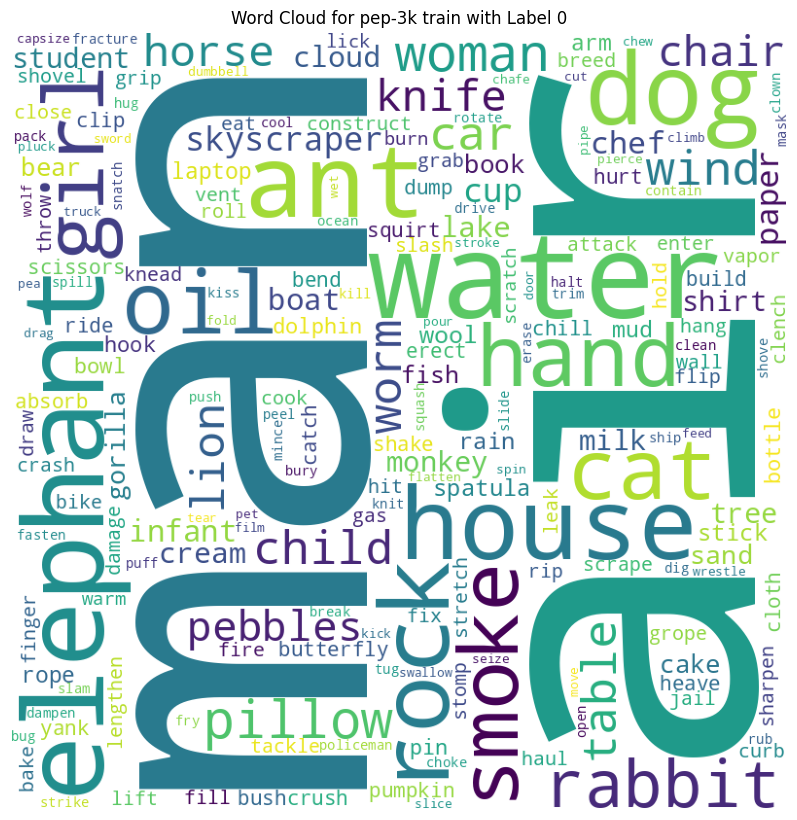

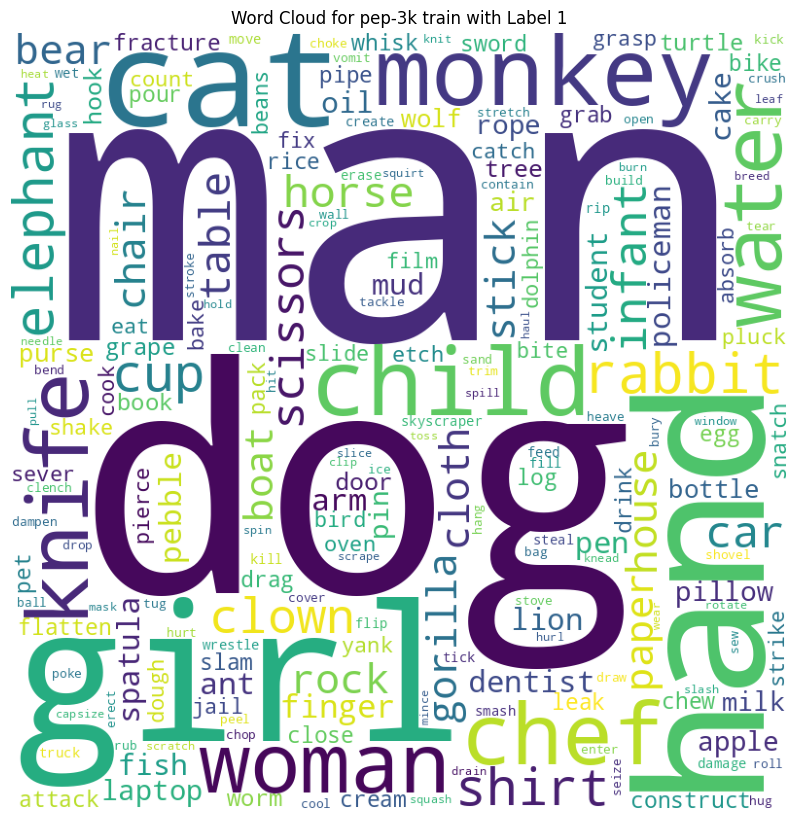

In [43]:
# Generate train word cloud for label 0 and 1
generate_wordcloud(train_text_0, 'Word Cloud for pep-3k train with Label 0')
generate_wordcloud(train_text_1, 'Word Cloud for pep-3k train with Label 1')

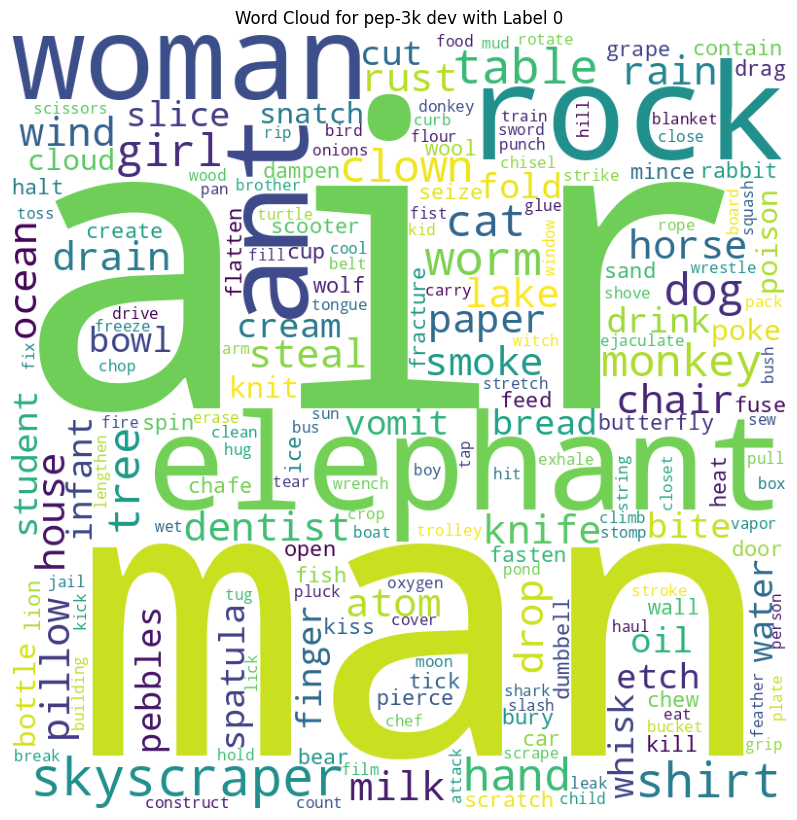

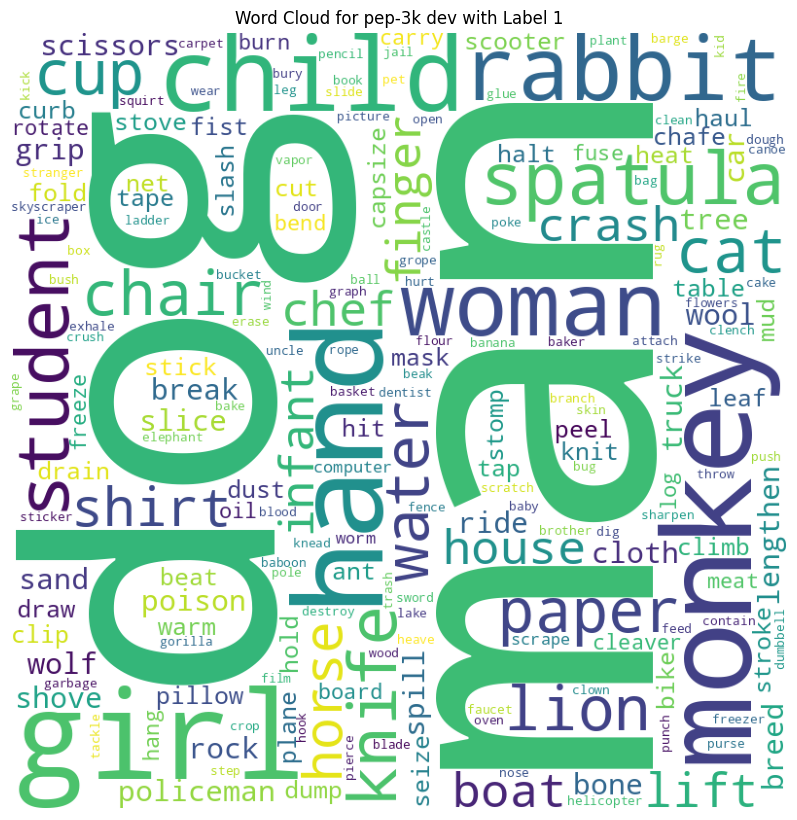

In [44]:
# Generate dev word cloud for label 0 and 1
generate_wordcloud(dev_text_0, 'Word Cloud for pep-3k dev with Label 0')
generate_wordcloud(dev_text_1, 'Word Cloud for pep-3k dev with Label 1')

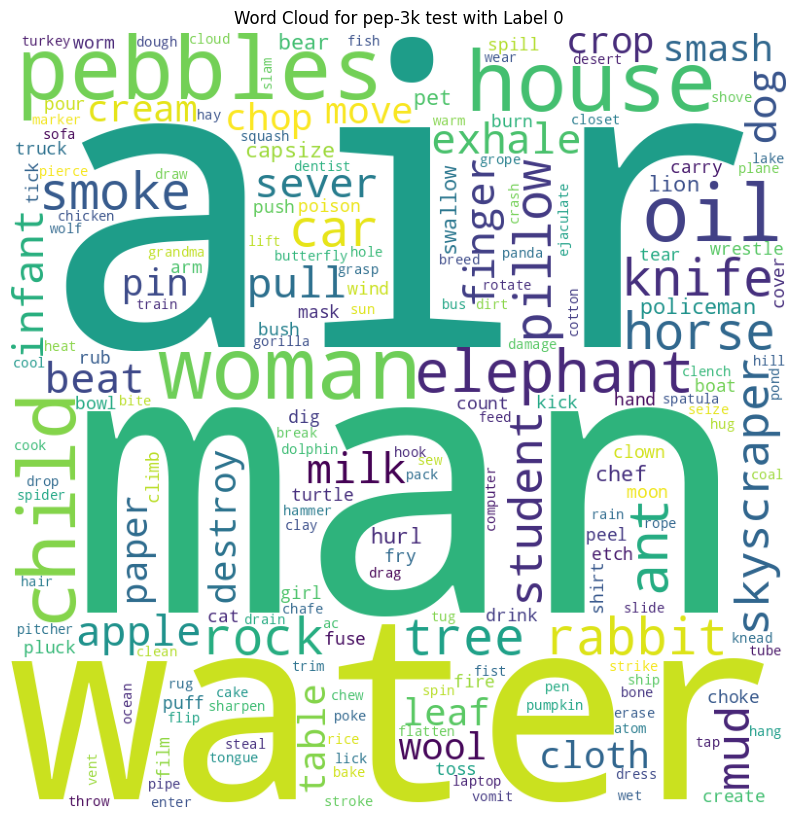

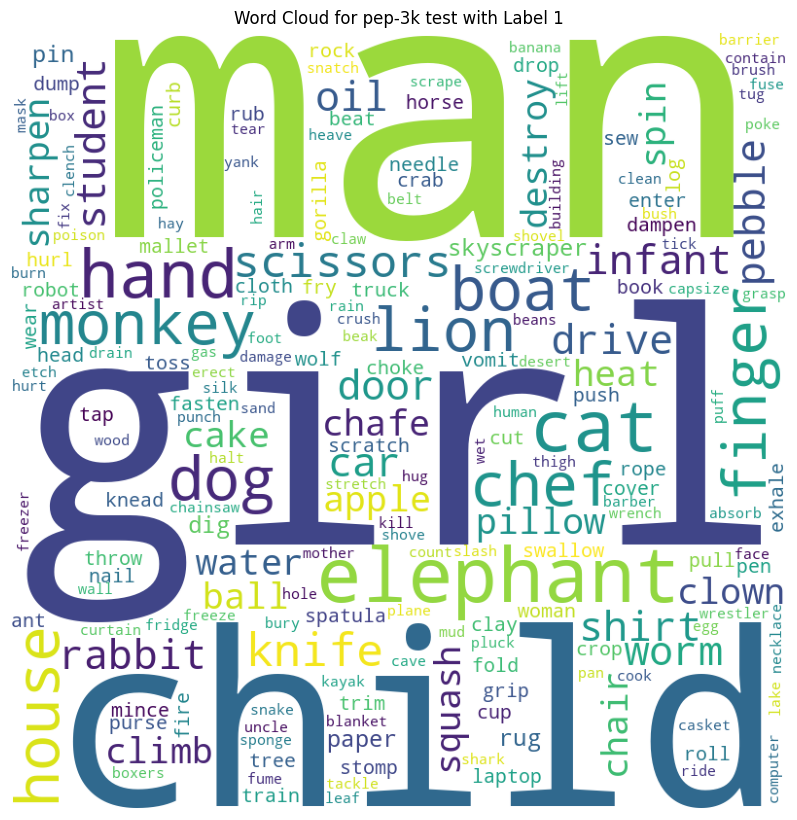

In [45]:
# Generate test word cloud for label 0 and 1
generate_wordcloud(test_text_0, 'Word Cloud for pep-3k test with Label 0')
generate_wordcloud(test_text_1, 'Word Cloud for pep-3k test with Label 1')

## Semantic Analysis

### Use Gensim to explore the semantic similarities between words in the dataset. This could help identify whether certain types of verbs or objects are more associated with plausible or implausible labels.

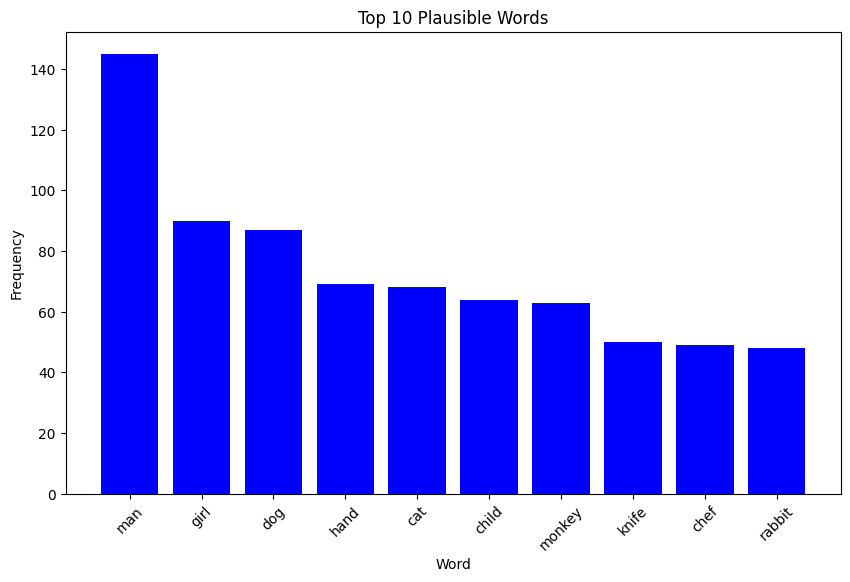

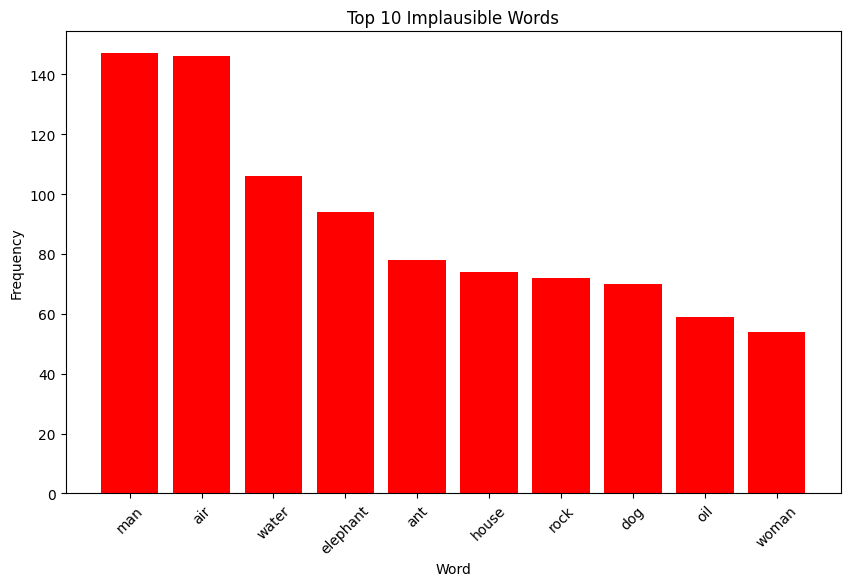

In [46]:
# Explore the most frequent (im)plausible words in the datasets

# Aggregate text by label
combined_df = pd.concat([pep_train_df, pep_dev_df, pep_test_df], ignore_index=True)
plausible_text = ' '.join(combined_df[combined_df['label'] == 1]['text'].astype(str))
implausible_text = ' '.join(combined_df[combined_df['label'] == 0]['text'].astype(str))

# Tokenize and count
plausible_counts = Counter(word_tokenize(plausible_text))
implausible_counts = Counter(word_tokenize(implausible_text))

# Get most common words
top_plausible = plausible_counts.most_common(10)
top_implausible = implausible_counts.most_common(10)

# Convert the most common words data into DataFrame
df_plausible = pd.DataFrame(top_plausible, columns=['Word', 'Frequency'])
df_implausible = pd.DataFrame(top_implausible, columns=['Word', 'Frequency'])

# Plot for Plausible Words
plt.figure(figsize=(10, 6))
plt.bar(df_plausible['Word'], df_plausible['Frequency'], color='blue')
plt.title('Top 10 Plausible Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot for Implausible Words
plt.figure(figsize=(10, 6))
plt.bar(df_implausible['Word'], df_implausible['Frequency'], color='red')
plt.title('Top 10 Implausible Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Use word2vec model to find similarities between top words in different categories

# Tokenize each sentence into words
tokenized_sentences = [word_tokenize(sentence) for sentence in combined_df['text']]

# Train a model on the triples
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save(CACHE_PATH + 'pep_similarity.model')

# Use the model
for word_p, _ in top_plausible:
    for word_i, _ in top_implausible:
        similarity = model.wv.similarity(word_p, word_i)
        print(f"Similarity between '{word_p}' and '{word_i}': {similarity}")

Similarity between 'man' and 'man': 1.0
Similarity between 'man' and 'air': 0.9563867449760437
Similarity between 'man' and 'water': 0.9515416622161865
Similarity between 'man' and 'elephant': 0.9502976536750793
Similarity between 'man' and 'ant': 0.9527513384819031
Similarity between 'man' and 'house': 0.9511212110519409
Similarity between 'man' and 'rock': 0.9396823048591614
Similarity between 'man' and 'dog': 0.95689457654953
Similarity between 'man' and 'oil': 0.9581047892570496
Similarity between 'man' and 'woman': 0.9608001708984375
Similarity between 'girl' and 'man': 0.9532331824302673
Similarity between 'girl' and 'air': 0.9450749158859253
Similarity between 'girl' and 'water': 0.952690601348877
Similarity between 'girl' and 'elephant': 0.9471139311790466
Similarity between 'girl' and 'ant': 0.938674807548523
Similarity between 'girl' and 'house': 0.9426100254058838
Similarity between 'girl' and 'rock': 0.9321221709251404
Similarity between 'girl' and 'dog': 0.9491521120071411

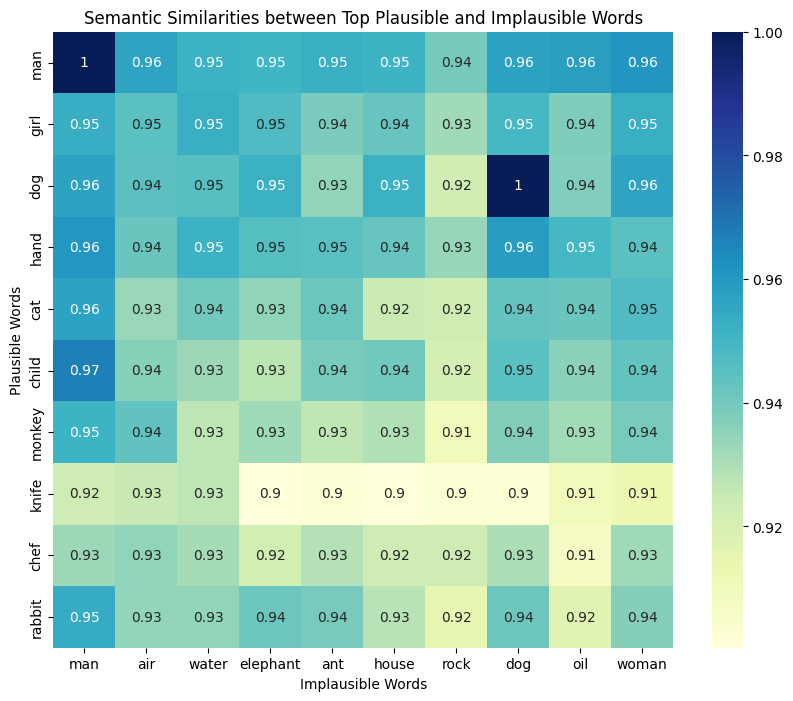

In [48]:
# Creat a heatmap to see the similarities between top words

# Assuming top_plausible and top_implausible are lists of tuples (word, frequency)
plausible_words = [word for word, _ in top_plausible]
implausible_words = [word for word, _ in top_implausible]

# Create a matrix of similarities
similarity_matrix = np.zeros((len(plausible_words), len(implausible_words)))

for i, word_p in enumerate(plausible_words):
    for j, word_i in enumerate(implausible_words):
        similarity_matrix[i, j] = model.wv.similarity(word_p, word_i)

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(similarity_matrix, index=plausible_words, columns=implausible_words)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.title("Semantic Similarities between Top Plausible and Implausible Words")
plt.xlabel("Implausible Words")
plt.ylabel("Plausible Words")
plt.show()